# Binary Tree

A simple class representing a node within a binary tree.

In [1]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

Some objects representing nodes in a tree

In [2]:
node0 = TreeNode(3)
node1 = TreeNode(4)
node2 = TreeNode(5)

Now we can connect the nodes by setting `.left` and `.right` properties of `node0`

In [3]:
node0.left = node1
node0.right = node2

Now we have a tree similar to this

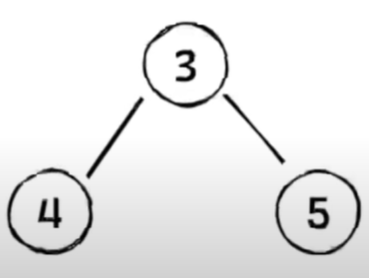

Then we assign the root node to variable `tree` and use it to access other nodes.

In [4]:
tree = node0

In [5]:
tree.key

3

In [6]:
tree.left.key

4

In [7]:
tree.right.key

5

# Transversing a binary tree

1. Inorder transversal
2. Preorder transversal
3. Postorder transversal

## Inorder Transversal
 - Traverse the left subtree recursively inorder
 - Traverse the current node
 - Traverse the right subtree recursively inorder
 
 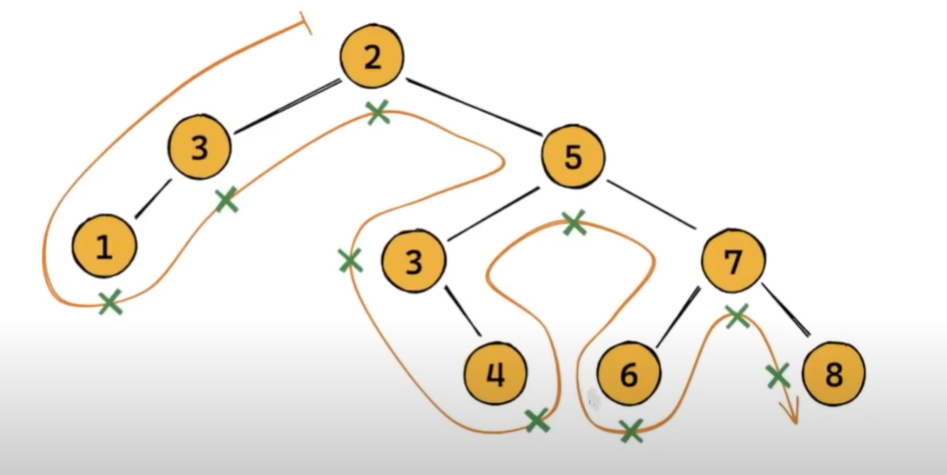

 

## Preorder Transversal
 - Traverse the current node
 - Traverse the left subtree recursively perorder
 - Traverse the right subtree recursively preorder
 
 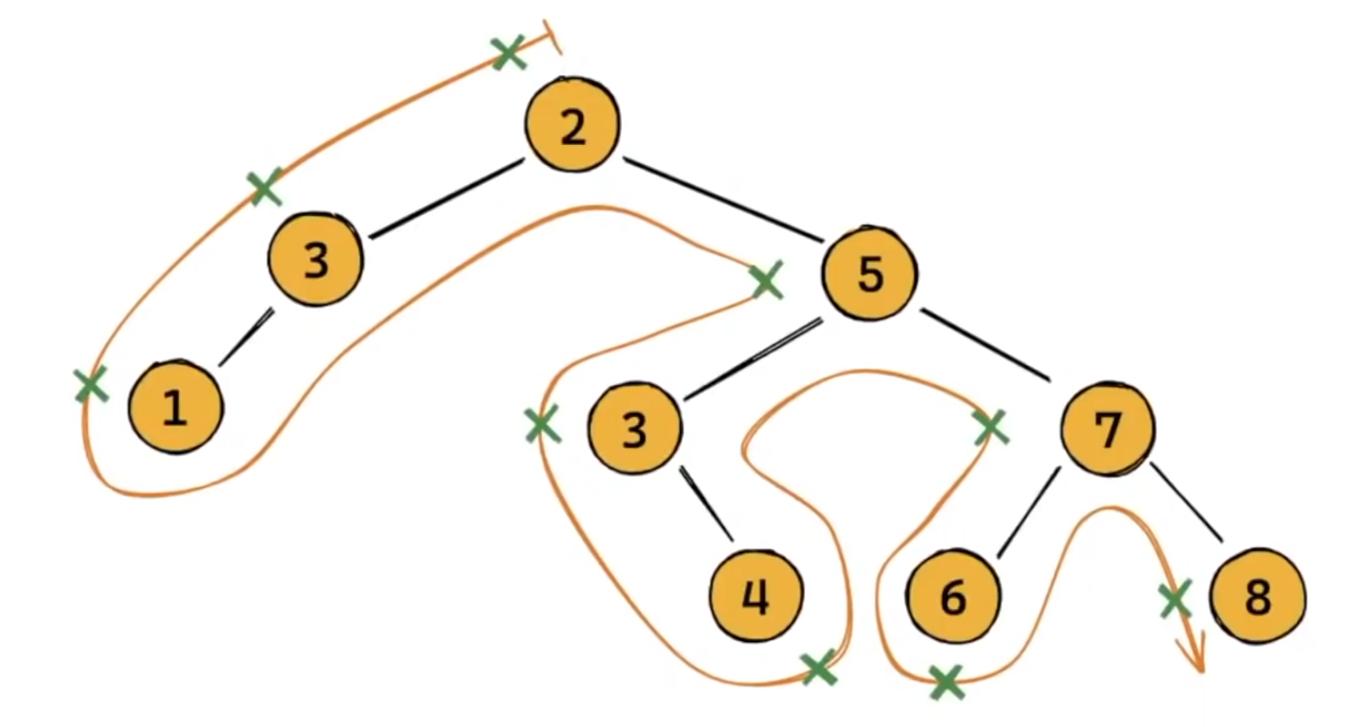
 

## Postorder Traversal
 - Traverse the left subtree recursively postorder
 - Traverse the right subtree recursively postorder
 - Traverse the current node

Function that converts a tuple of structure (`left_subtree`, `key`, `right_subtree`) into binary tree.

In [8]:
def parse_tuple(data):
    if isinstance(data, tuple) and len(data) == 3:
        node = TreeNode(data[1])
        node.left = parse_tuple(data[0])
        node.right = parse_tuple(data[2])
    
    elif data is None:
        node = None
    else:
        node = TreeNode(data)
    return node

In [9]:
tree = parse_tuple(((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8))))

The above tree represents the following Binary Tree:
    
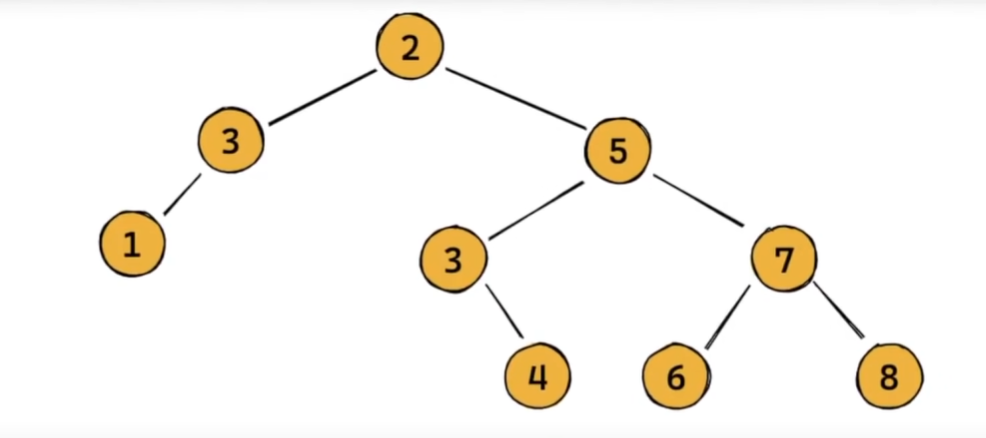
    

Function to calculate the height of a binary tree.

In [10]:
def tree_height(node):
    if node is None:
        return 0
    return 1 + max(tree_height(node.left), tree_height(node.right))

In [11]:
tree_height(tree)

4

Function to count the no. of nodes in binary tree

In [12]:
def tree_size(node):
    if node is None:
        return 0
    return 1 + tree_size(node.left) + tree_size(node.right)

In [13]:
tree_size(tree)

9

Traverse inorder function

In [14]:
def traverse_inorder(node):
    if node is None:
        return []
    return (traverse_inorder(node.left) + 
            [node.key] + traverse_inorder(node.right))

In [15]:
traverse_inorder(tree)

[1, 3, 2, 3, 4, 5, 6, 7, 8]

Traverse preorder function

In [16]:
def traverse_preorder(node):
    if node is None:
        return []
    return ([node.key] + traverse_preorder(node.left) + traverse_preorder(node.right))

In [17]:
traverse_preorder(tree)

[2, 3, 1, 5, 3, 4, 7, 6, 8]

Traverse postorder function

In [18]:
def traverse_postorder(node):
    if node is None:
        return []
    return (traverse_postorder(node.left) + traverse_postorder(node.right) + [node.key])

In [19]:
traverse_postorder(tree)

[1, 3, 4, 3, 6, 8, 7, 5, 2]

Adding all the functions to new `TreeNode` class

In [20]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        
    def height(self):
        if self is None:
            return 0
        return 1 + max(TreeNode.height(self.left), TreeNode.height(self.right))
    
    def size(self):
        if self is None:
            return 0
        return 1+ TreeNode.size(self.left) + TreeNode.size(self.right)
    
    def traverse_inorder(self):
        if self is None:
            return []
        return (TreeNode.traverse_inorder(self.left) + [self.key] + TreeNode.traverse_inorder(self.right))
    
    def traverse_preorder(self):
        if self is None:
            return []
        return ([self.key] + TreeNode.traverse_preorder(self.left) + TreeNode.traverse_preorder(self.right))
    
    def traverse_postorder(self):
        if self is None:
            return []
        return (TreeNode.traverse_postorder(self.left) + TreeNode.traverse_postorder(self.right) + [self.key])
    
    def to_tuple(self):
        if self is None:
            return None
        if self.left is None and self.right is None:
            return self.key
        return TreeNode.to_tuple(self.left), self.key, TreeNode.to_tuple(self.right)
    
    def __str__(self):
        return "BinaryTree <{}>".format(self.to_tuple())

    def __repr__(self):
        return "BinaryTree <{}>".format(self.to_tuple())
    

In [21]:
tree = parse_tuple(((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8))))

In [22]:
tree

BinaryTree <((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))>

# Binary Search Tree

A binary tree that satisfies the following conditions:
 1. The left subtree of any node contains nodes with keys less than the node's key
 2. The right subtree of any node contains nodes with keys greater than the node's key
 *Every subtree of a binary search tree must also be a binary search tree*
 

Function to check if a Binay Tree is a Binary Search Tree

In [29]:
def remove_none(nums):
    return [x for x in nums if x is not None]

def is_bst(node):
    if node is None:
        return True, None, None
    is_bst_l, min_l, max_l = is_bst(node.left)
    is_bst_r, min_r, max_r = is_bst(node.right)
    
    is_bst_node = (is_bst_l and is_bst_r and
                  (max_l is None or node.key > max_l) and
                  (min_r is None or node.key < min_r))
    
    min_key = min(remove_none([min_l, node.key, min_r]))
    max_key = max(remove_none([max_l, node.key, max_r]))
    
#     print(node.key, min_key, max_key, is_bst_node)
    
    return is_bst_node, min_key, max_key

The following binary tree is not a binary search tree, as a node with the key 3 is in the left subtree of a node with the key 2

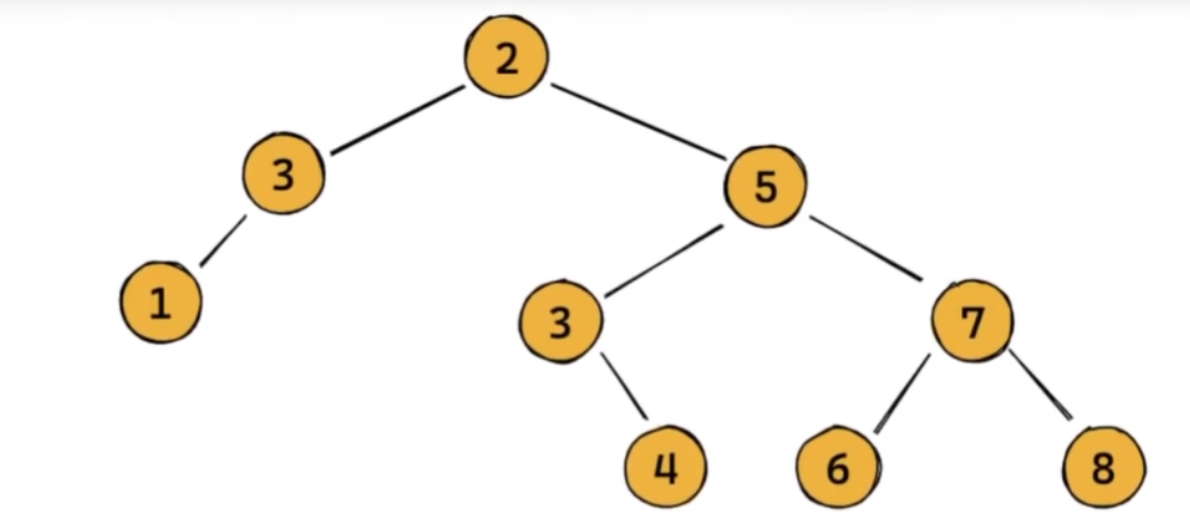


In [30]:
is_bst(tree)

(False, 1, 8)

But the following is a BST:

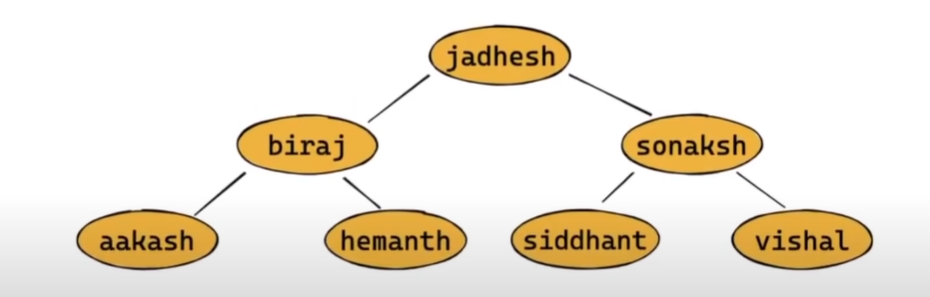


In [32]:
tree1 = parse_tuple((('aakash', 'biraj', 'hemanth'), 'jadhesh', ('siddhant', 'sonaksh', 'vishal')))

In [33]:
is_bst(tree1)

(True, 'aakash', 'vishal')

# Storing Key-Value Pairs

A new class `BSTNode` similar to `TreeNode` but can also store a value and pointer to parent node.

In [46]:
class BSTNode:
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

Another class `User` to represent each person in the above diagram

In [42]:
class User:
    def __init__(self, username, email):
        self.username = username
        self.email = email
    
    def __repr__(self):
        return "User(username='{.username}', email='{.email}')".format(self, self)
    
    def __str__(self):
        return self.__repr__()

In [47]:
jadhesh = User('jadhesh', 'jadhesh@mail.com')
biraj = User('biraj', 'biraj@mail.com')
aakash = User('aakash', 'aakash@mail.com')
hemanth = User('hemanth', 'hemanth@mail.com')
sonaksh = User('sonaksh', 'sonaksh@mail.com')
siddhant = User('siddhant', 'siddhant@mail.com')
vishal = User('vishal', 'vishal@mail.com')

In [48]:
tree = BSTNode(jadhesh.username, jadhesh)

In [51]:
tree.key, tree.value

('jadhesh', User(username='jadhesh', email='jadhesh@mail.com'))

In [52]:
tree.left = BSTNode(biraj.username, biraj)
tree.right = BSTNode(sonaksh.username, sonaksh)

In [55]:
tree.left.key, tree.left.value, tree.right.key, tree.right.value

('biraj',
 User(username='biraj', email='biraj@mail.com'),
 'sonaksh',
 User(username='sonaksh', email='sonaksh@mail.com'))

In [56]:
tree.left.left = BSTNode(aakash.username, aakash)
tree.left.right = BSTNode(hemanth.username, hemanth)

tree.right.left = BSTNode(siddhant.username, siddhant)
tree.right.right = BSTNode(vishal.username, vishal)